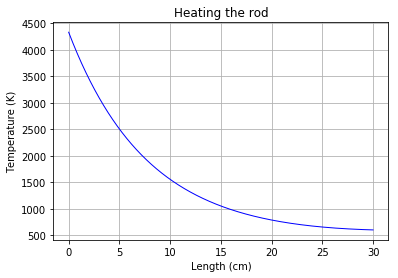

In [32]:
class Data:
    x0 = 0
    l = 10          # длина стержня
    R = 0.5          # радиус стержня
    Text = 300       
    F0 = 100        
    k0 = 0.2       
    kN = 0.5        
    alpha0 = 1e-2   
    alphaN = 9e-3  
    h = 1e-2
    bk = (kN * l) / (kN - k0)
    ak = - k0 * bk
    b_alpha = (alphaN * l) / (alphaN - alpha0)
    a_alpha = - alpha0 * b_alpha

    def k(x):
        return Data.ak / (x - Data.bk)

    def alpha(x):
        return Data.a_alpha / (x - Data.b_alpha)

    def Xn_plus_half(x):
        return (2 * Data.k(x) * Data.k(x + Data.h)) / \
               (Data.k(x) + Data.k(x + Data.h))

    def Xn_minus_half(x):
        return (2 * Data.k(x) * Data.k(x - Data.h)) / \
               (Data.k(x) + Data.k(x - Data.h))

    def p(x):
        return 2 * Data.alpha(x) / Data.R

    def f(x):
        return 2 * Data.alpha(x) / Data.R * Data.Text


def algorithm(A, B, C, D, K0, M0, P0, KN, MN, PN):  
    xi = [None, - M0 / K0]
    eta = [None, P0 / K0]

    for i in range(1, len(A)):
        x = C[i] / (B[i] - A[i] * xi[i])
        e = (D[i] + A[i] * eta[i]) / (B[i] - A[i] * xi[i])

        xi.append(x)
        eta.append(e)

    y = [(PN - MN * eta[-1]) / (KN + MN * xi[-1])]

    for i in range(len(A) - 2, -1, -1):
        y_i = xi[i + 1] *  y[0] + eta[i + 1]

        y.insert(0, y_i)

    return y

from numpy import arange
import matplotlib.pyplot as plt


def left_boundary_conditions():
    X_half = Data.Xn_plus_half(Data.x0)
    p1 = Data.p(Data.x0 + Data.h)
    f1 = Data.f(Data.x0 + Data.h)

    p0 = Data.p(Data.x0)
    f0 = Data.f(Data.x0)

    p_half = (p0 + p1) / 2

    K0 = X_half + Data.h * Data.h * p_half / 8 + Data.h * Data.h * p0 / 4
    M0 = Data.h * Data.h * p_half / 8 - X_half
    P0 = Data.h * Data.F0 + Data.h * Data.h * (3 * f0 + f1) / 4

    return K0, M0, P0


def right__boundary_conditions():
    X_half = Data.Xn_minus_half(Data.l)

    pN = Data.p(Data.l)
    pN1 = Data.p(Data.l - Data.h)
    fN = Data.f(Data.l)
    fN1 = (2 * Data.alpha(Data.l - Data.h)) / Data.R * Data.Text

    KN = - (X_half + Data.alphaN * Data.h) / Data.h - Data.h * (5 * pN + pN1) / 16
    MN = X_half / Data.h - Data.h * (pN + pN1) / 16
    PN = - Data.alphaN * Data.Text - Data.h * (3 * fN + fN1) / 8

    return KN, MN, PN


def calc_coefficients():
    A = []
    B = []
    C = []
    D = []

    for i in arange(Data.x0, Data.l, Data.h):
        An = Data.Xn_minus_half(i) / Data.h
        Cn = Data.Xn_plus_half(i) / Data.h
        Bn = An + Cn + Data.p(i) * Data.h
        Dn = Data.f(i) * Data.h

        A.append(An)
        B.append(Bn)
        C.append(Cn)
        D.append(Dn)

    return A, B, C, D


if __name__ == "__main__":
    a, b, c, d = calc_coefficients()
    k0, m0, p0 = left_boundary_conditions()
    kN, mN, pN = right__boundary_conditions()
    T = algorithm(a, b, c, d, k0, m0, p0, kN, mN, pN)
    #print(T)
    x = arange(Data.x0, Data.l, Data.h)

    plt.title('Heating the rod')
    plt.grid(True)
    plt.plot(x, T, 'b', linewidth=1.0)
    plt.xlabel("Length (cm)")
    plt.ylabel("Temperature (K)")

    plt.savefig("plot.png")

    plt.show()
